# **Redes de computadores :** LLM - Question Answering over Documents
---
## Ivan Yesid Sepulveda Paez


**Docente:**

* Octavio José Salcedo Parra
* Redes de Computadores -22 de noviembre de 2023


---

## **1. Objetivo del Proyecto**

Desarrollar una aplicación que permita interactuar con un conjunto de documentos
usando un modelo grande de lenguaje **(*LLM*).**

---

## **2. Modelación del flujo**

A continuacion se presenta la modelacion del flujo utilizado en el desarrollo del proyecto, particularmente se retrata la idea general haciendo uso del siguiente diagrama, en el cual se explican las diferentes etapas en el proceso de construccion del modelo.

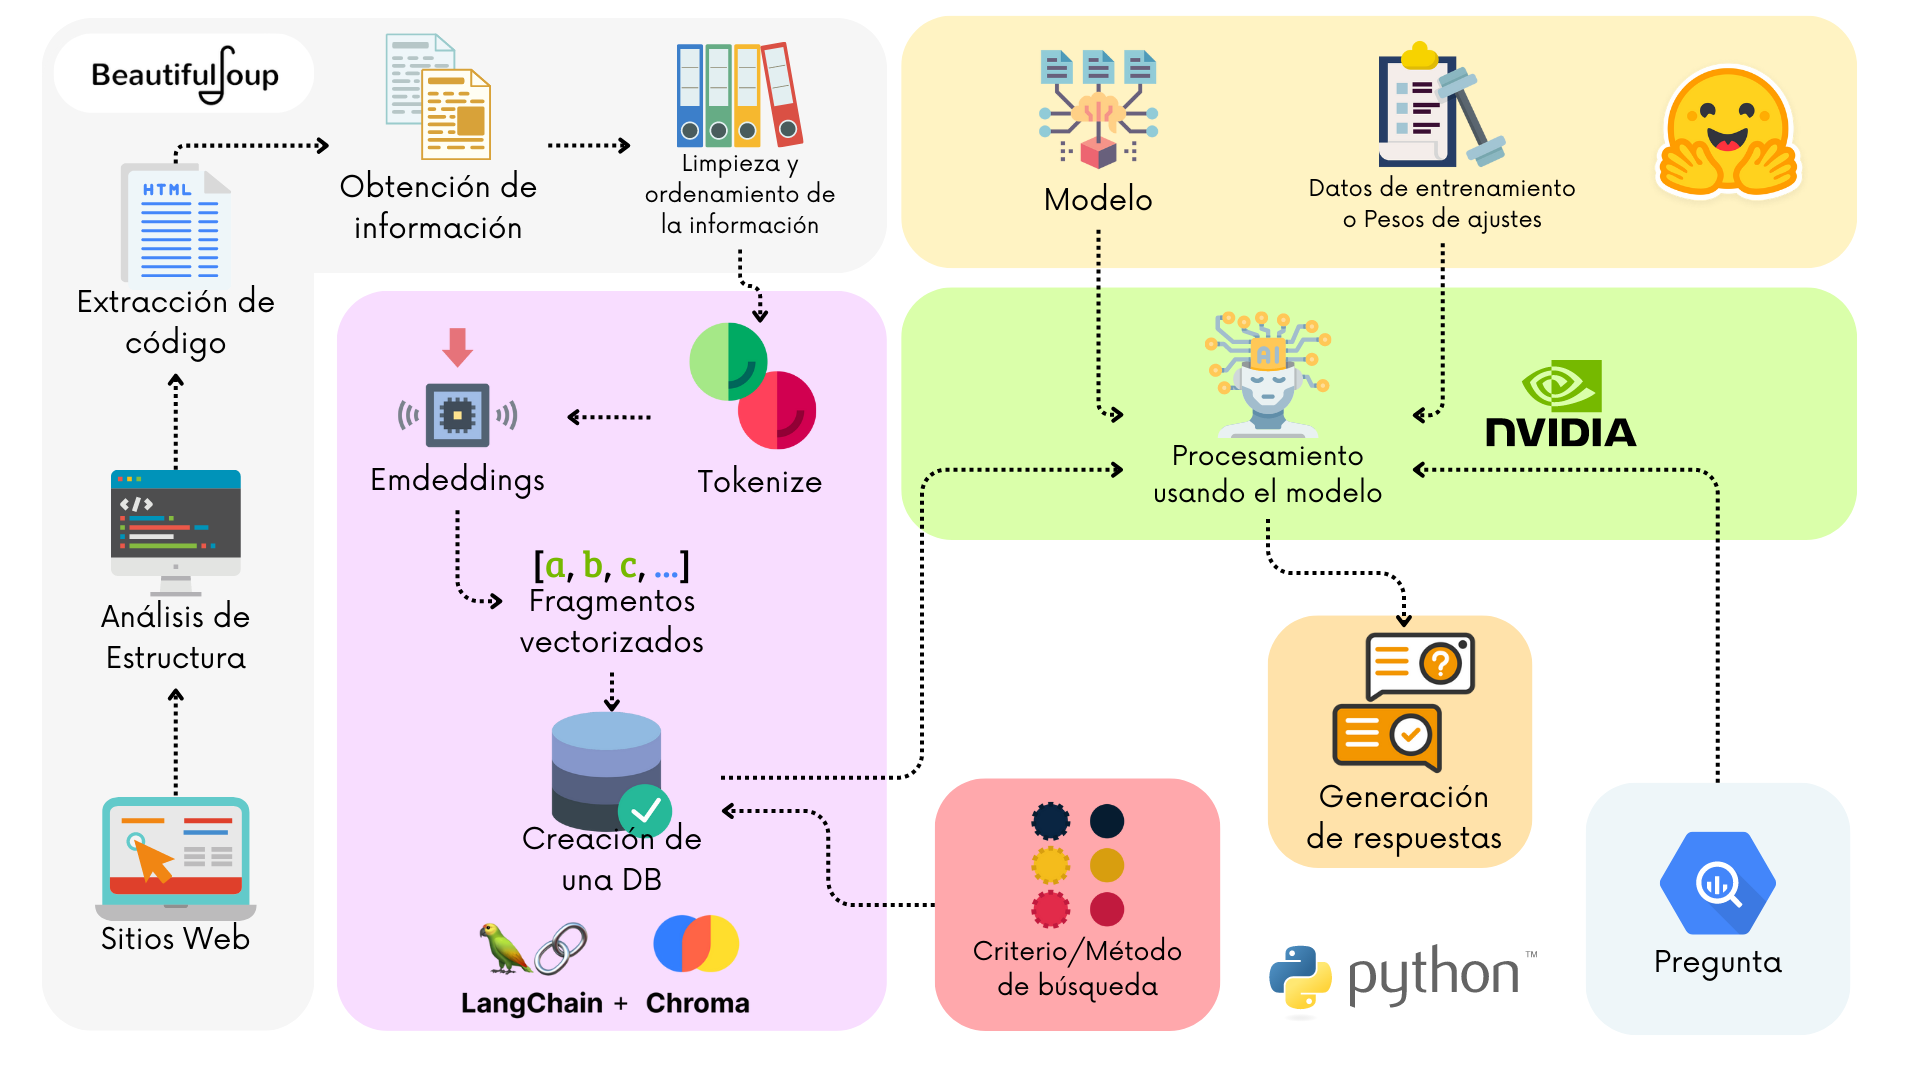

---

>>> `Fuente: Imagen de elaboración propia`

---

## **3. Carga de datos**

La carga de datos corresponde a la parte del proceso en el cual se trae la información ya sea en bruto o procesada con la cual se alimentara el modelo.

* Esta informacíon puede transformarse en un recurso para el entrenamiento del modelo solamente si se posee la suficiente cantidad de informacion, en este caso la informacion cumple el rol de ser un **"contexto"** con el cual se planeo alimentar el modelo.

### 3.1 **Instalar Wget**

**Wget** es una herramienta informática creada por el **Proyecto GNU**. Puede ser usado para recuperar contenido y archivos de varios servidores web. El nombre es una combinación de World Wide Web y la palabra get. Admite descargas a través de FTP, SFTP, HTTP y HTTPS. [¿Qué es el Comando Wget?](https://www.hostinger.co/tutoriales/usar-comando-wget/)

* En este caso, **Wget** se intala para obtener del repositorio del proyecto el conjunto de datos preprocesado.

* Los datos Preprocesados corresponde al resultado del proceso de webscrapping ejecutado sobre las 6 paginas que componen la resolución del proceso de Admisiones de la **Universidad Nacional de Colombia**

* Estos datos son un archivo **.TXT** (*Disponible para consulta*) con los parrafos que componen las resoluciones, los cuales han sido previamente procesados para la eliminacion de caracteres especiales del lenguaje latino; **Tales como tildes, dieresis o virgulillas**

(*Nota:* El codigo anexo en la segunda celda es la muestra del codigo utilizado para este procesamiento, sin embargo no es necesaria su ejecucion.)



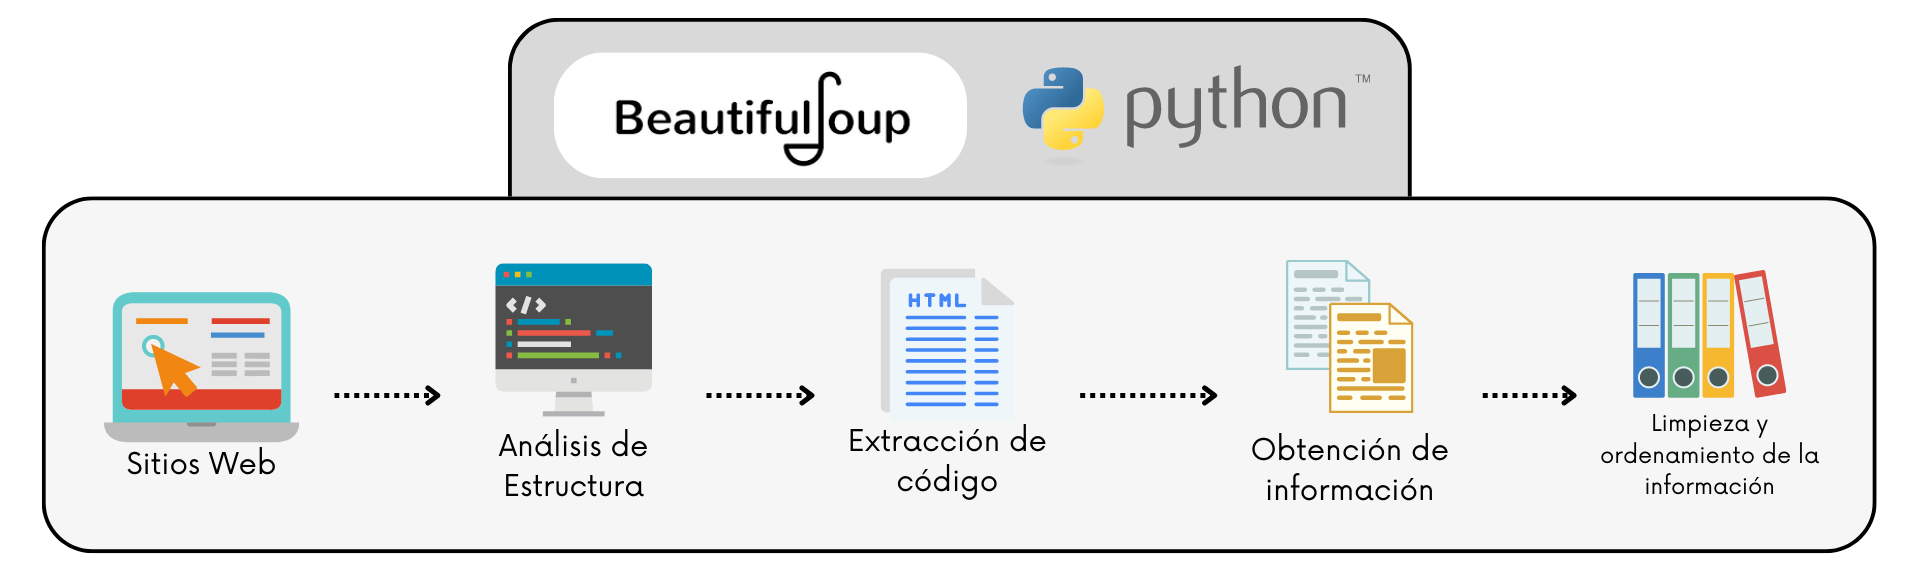

>>> `Fuente: Imagen de elaboración propia`

In [ ]:
! apt-get install wget
! wget -O resultado.txt "https://raw.githubusercontent.com/bjportelac/UP-0001-MainCodeAndData/main/resultadoProcesado.txt"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
wget is already the newest version (1.20.3-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
--2023-06-19 05:15:57--  https://raw.githubusercontent.com/bjportelac/UP-0001-MainCodeAndData/main/resultadoProcesado.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219400 (214K) [text/plain]
Saving to: ‘resultado.txt’

resultado.txt       100%[===================>] 214.26K  --.-KB/s    in 0.005s  

2023-06-19 05:15:58 (46.3 MB/s) - ‘resultado.txt’ saved [219400/219400]



---

## **4. Carga de Librerias**

A continuacion se cargan las librerias necesarias para la construccion del modelo, se resume brevemente la finalidad de cada una:

| **Librería**           | Finalidad/Uso                                                                   |
|-----------------------|---------------------------------------------------------------------------------|
| **fire**                  | Herramienta de línea de comandos para Python                                     |
| **gradio**                | Creación de interfaces de usuario personalizadas para modelos de aprendizaje automático |
| **transformers**          | Procesamiento del lenguaje natural (NLP) basado en PyTorch                       |
| **peft**                  | Técnicas de PEFT de última generación para un rendimiento comparable al ajuste fino completo |
| **sentencepiece**         | Tokenizador de texto no supervisado para modelos neuronales                       |
| **accelerate**            | Aceleración del entrenamiento y la inferencia en PyTorch                          |
| **bitsandbytes**          | Manipulación de bits y bytes en Python                                            |
| **langchain**             | Trabajo con cadenas de idiomas en Python                                          |
| **sentence_transformers** | Codificación de oraciones y documentos en vectores                                |
| **chromadb**              | Trabajo con bases de datos cromáticas                                             |
| **xformers**              | Procesamiento del lenguaje natural (NLP) basado en PyTorch                        |

In [ ]:
!pip install fire
!pip install gradio
!pip install transformers
!pip install git+https://github.com/huggingface/peft.git
!pip install sentencepiece
!pip install accelerate
!pip install bitsandbytes
!pip install langchain
!pip install sentence_transformers
!pip install chromadb
!pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=edbf6e677ac9f13dbae70fa2603137c89c8f6313914bf9d0df10628dcda6bc5b
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

---

## **5. Optimización del procesamiento mediante GPU**
Durante la primera iteración de este proyecto, se había planeado la construcción del modelo haciendo uso de los binarios dispuestos en **HuggingFace y GPT4All.**

* En principio, se había propuesto la interacción experimental con el modelo **groovy** ya que en algunas de las evidencias se mostraba que poseía cierta comprensión del idioma español.

> Sin embargo, esta idea se descartó rápidamente debido a que después de algunas queries simples *el modelo no parecía reconocer del todo el lenguaje y el análisis de sintaxis hecho a las respuestas carecían de coherencia.*

* Después de una búsqueda más amplia, se decidió usar el modelo de AlpacaLoRA-7B disponible en HuggingFaces y trabajado por ()

> Durante esta iteración se notó que el modelo era compatible con el idioma español y sus respuestas carecían de mayor coherencia, sin embargo el procesamiento de los requerimientos del modelo no podía ejecutarse al momento de descargar los **“shards”** del modelo, por lo cual se pasó a procesamiento en **GPU para liberar la carga de la RAM del notebook.**

> **Nota:** *Este proceso se descubrió e implementó al abrir el archivo **Generate.py** el cual mostraba los pasos de construcción que seguía el modelo en el cual se hacía una verificación de si el entorno poseía GPU disponible.*

* Para la segunda iteración y para la tercera,**se decidió trabajar con el mismo modelo pero cambiando la forma en la cual se obtenía el mismo desde la web**, sin embargo, por eficiencia *y otros factores que se enuncian más adelante* se preservó el trabajo sobre la GPU.

---

In [ ]:
import torch
import tensorflow as tf

print(torch.cuda.is_available()) # Verifica si CUDA está disponible en el sistema.
print(tf.test.gpu_device_name()) # Imprime el nombre del dispositivo GPU.

True
/device:GPU:0


In [ ]:
! nvidia-smi # Muestra información sobre las GPU NVIDIA disponibles en el sistema.
! nvcc --version # Muestra la versión de nvcc (NVIDIA CUDA Compiler).

Mon Jun 19 05:19:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |    881MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

## **6. Proceso general de construccion.**

A continuación se detalla el proceso de construcción del modelo

### **6.1 Selección y carga del Modelo:**

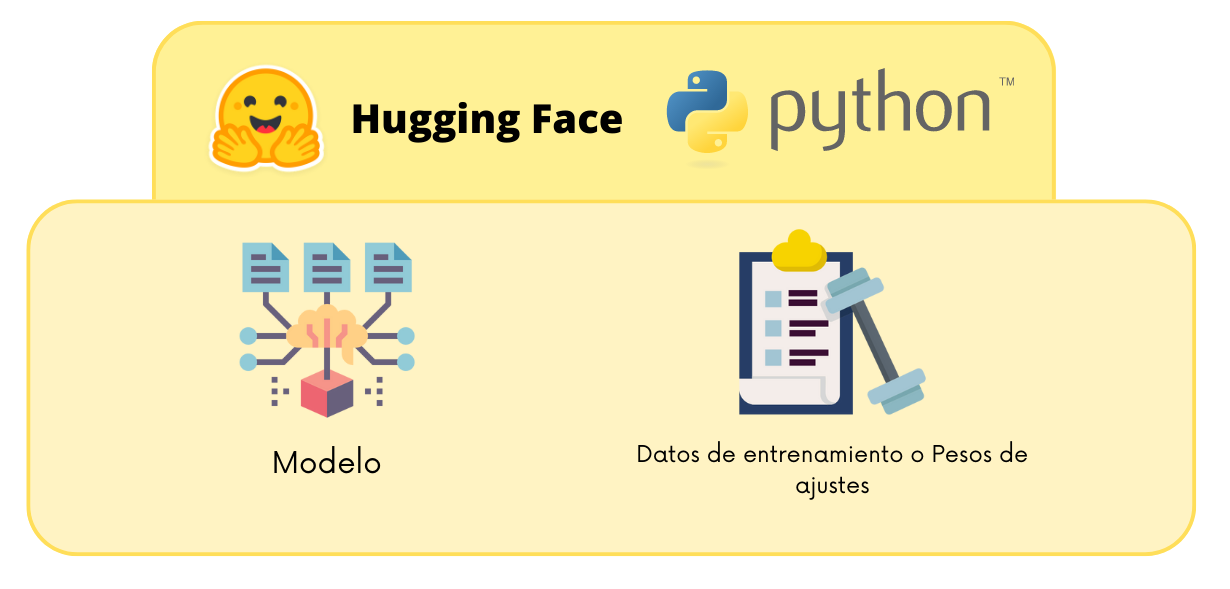

>>> `Fuente: Imagen de elaboración propia`
---
Definir un modelo con el cual trabajar, nos permita hacer el procesamiento de los documentos; Y mas importante **Que aprenda sobre nuestros documentos**:

En nuestro caso despues de pruebas con otros modelos, decidimos utilizar el modelo **AlpacaLoRA 7B**, el cual hace uso de **LLaMA 7b-HF**.

* **AlpacaLoRA 7B** es un adaptador de baja clasificación para **LLaMA-7b** ajustado en el conjunto de datos **Stanford Alpaca.** Es un modelo de lenguaje natural que se puede utilizar para tareas de procesamiento del lenguaje natural como la generación de texto y la traducción automática.
> **El modelo viene entrenado con los siguientes hiperparámetros:**
>
> * **Epochs:** 10 (cargar desde la mejor época)
> * **Tamaño del lote:** 128;
> * **Longitud de corte:** 512;
> * **Tasa de aprendizaje:** 3e-4;

* **LLaMA-7b** es un modelo de lenguaje natural basado en la arquitectura de transformador que se puede utilizar para tareas de procesamiento del lenguaje natural como la generación de texto y la traducción automática.

* **LoRA** es un adaptador de baja clasificación para LLaMA-7b ajustado en el conjunto de datos Stanford Alpaca. Un adaptador de baja clasificación es un tipo de adaptador que se utiliza para ajustar un modelo de lenguaje preentrenado a un conjunto de datos específico.

Uno de los criterios mas importantes que influyo en la seleccion del modelo fue la capacidad de procesamiento de lenguaje español **(Más avanzada que otros lenguajes)**, ademas de que su uso es bastante intuitivo ya sea mediante manipulacion de binarios como mediante el **PipeLine de HuggingFaces**.

* **Guanaco-LoRA** es un modelo entrenado a partir de LLaMA y Alpaca, diseñado con la finalidad de entender el idioma Español. Este modelo fue entrenado a partir de la traduccion del conjunto de datos de alpaca. En este caso, se utilizan los pesos de Guanaco para poder computar y mejorar las predicciones de la red neuronal.

In [ ]:
# Definimos el modelo base, en este caso LLaMA 7B (AlpacaLoRA-7B-Hf)
# y el archivo de pesos de guanaco.

base_model_path = 'decapoda-research/llama-7b-hf'
weights_path = "plncmm/guanaco-lora-7b"

---
### **6.2 TOKENIZACION E INCRUSTACIÓN**

transformer-tokenization-and-embeddings.drawio.svg

* **Transformers** es una biblioteca de aprendizaje automatico que ofrece una arquitectura NLP Para entrenar modelos.

* Utilizamos **Llamatokenizer para tokenizar** *(separar una entrada, en este caso un texto, en  secciones y asigmanos un valor numero a cada una, este puede representar la relevancia)* en este caso el tokenizado viene previamente entrenado para trabajar con el modelo LlaMA

In [ ]:
from transformers import LlamaTokenizer, LlamaForCausalLM, GenerationConfig, pipeline

tokenizer = LlamaTokenizer.from_pretrained(base_model_path)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


---

### 6.3 PEFT, creación y entrenamiento del modelo

**Parameter Efficient Fine Tuning (PEFT)** es una técnica utilizada en el procesamiento del lenguaje natural (NLP) para mejorar el rendimiento de los modelos de lenguaje pre-entrenados en tareas específicas.
* PEFT se utiliza para abordar los problemas de la afinación fina de los modelos de lenguaje pre-entrenados.
* PEFT se centra en la eficiencia de los parámetros y utiliza menos parámetros entrenables para lograr un rendimiento comparable al de la afinación fina.

En nuestro caso **PeftModel es una clase de modelo de HuggingFace que abarca varios métodos Peft.**
* Particularmente es un modelo base que se utiliza para Peft.
* El modelo base es un modelo transformador utilizado para Peft.
---
> * Cargamos el modelo y pasamos como base un modelo de lenguaje Causal de LLaMA el cual nos **permite predecir cual sera el siguiente token con base en los que hay actualmente.**
> * Para reducir el tamaño del modelo y hacerlo mas eficiente para correr en **Colab** lo cargamos en 8_bits
>* Finalmente, pasamos los pesos con los cuales queremos que se entrene la red neuronal del modelo, a pesar que puede que las capas subyacentes cambien de pesos, es importante dar estos pesos ya que nos permitira enforcar el modelo a la finalidad la cual en este punto es el entendimiento del proceso en español.


In [ ]:
from peft import PeftModel

base_model = LlamaForCausalLM.from_pretrained(
    base_model_path,
    load_in_8bit=True,
    device_map='auto',
)

model = PeftModel.from_pretrained(
    base_model,
    weights_path,
)


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('//172.28.0.1'), PosixPath('8013')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

---

### **6.4 Langchain + Chroma, comunicarnos con el modelo**

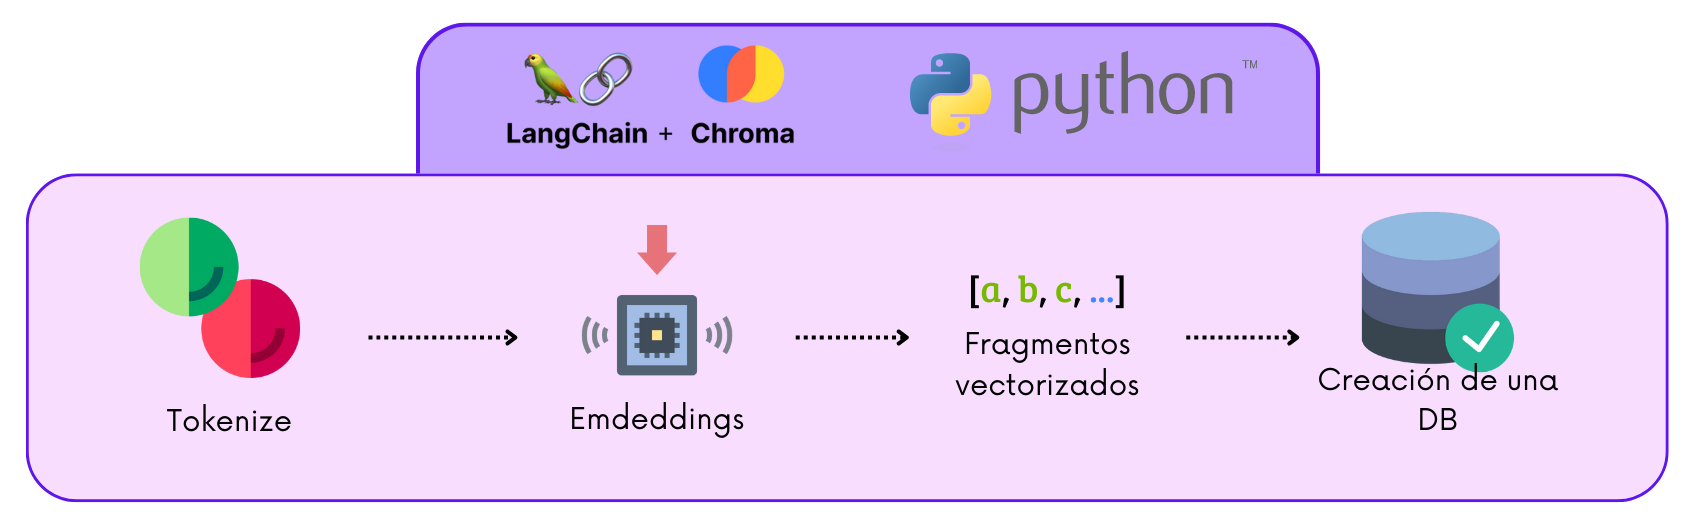


>>> `Fuente: Imagen de elaboración propia`

* **ChromaDB** es una base de datos de incrustación de código abierto y nativa de IA .
> * Es la forma más rápida de crear aplicaciones de Python o JavaScript con memoria utilizando modelos de lenguaje grandes (LLM) .
> * La API principal consta de solo 4 funciones:
>> * Configurar Chroma en memoria.
>> * Crear una colección.
>> * Agregar documentos a la colección y consultar.
>> * Buscar resultados similares a lo que se consulta.

Aunque Chroma no es la univa base de datos que permite esto , y hay alternativas como **FAISS y Vectra.** Al ser un requerimiento, se prefirio sobre otras bases.

Para este proyecto, se aprovecha la caracteristica de **busquedas por similaridad de Chroma**, lo cual permite cargar documentos, PDF y otros archivos. Sobre los cuales se pueden buscar resultados basados en el criterio de busqueda.

---

* LangChain es un marco para desarrollar aplicaciones impulsadas por modelos de lenguaje. Este nos permite colocar un conjunto de metodos diseñados para conectarse e interactuar con modelos.
> * Posee ventajas como la percepcion del contexto lo que le permite a los modelos interactuar con el ambiente.
> * Cuenta con formas de co nectar a diferentes fuentes de datos.
* Estas funcionalidades, y las multiples integraciones de LangChain nos permiten brindar e contexto obtenido de los documentos para que el modelo lo procese.


---
* Creamos un pipeline con el cual podemos ajustar y configurar parametros del modelo, entre los mas importantes tenemos:

>* Comporatamiento del modelo.
>* Modelo a utilizar y tokenizador de procesamiento textual.
>* Penalidad por repeticion en la generacion de respuestas.
>* Maximo de tokens que pueden Generarse para las respuesta.
> * Longitud maxima de la entrada que procesara el Modelo.

Pasamos todo esto a nuestro modelo local, que ya preEntrenado ahora posee una forma de validar las respuestas que genera.

In [ ]:
from langchain.llms import HuggingFacePipeline

pipe = pipeline(
    "text-generation",
    model=base_model,
    tokenizer = tokenizer,
    max_length = 256,
    temperature = 0.1,
    top_p = 0.75,
    top_k = 40,
    repetition_penalty=1.1,
    max_new_tokens = 256,
)

local_llm = HuggingFacePipeline(pipeline=pipe)

---
* Usamos la funcion **TextLoader** para cargar el documento que contiene las respuestas en una variable para procesarla.

* Esto debido a que el procesamiento debe hacerse sobre fragmentos del texto por que a pesar de que habilitar la GPU en el ambiente e sutil, se pueden llegar a ubicar gigas de memoria para el procesamiento sobrecargando el modelo y el ambiente.

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader("/content/resultado.txt")
documents = loader.load()

* Para seccionar el documento en en fragmentos, utilizamos un separado de caracteres recursivo que iterara sobre un conjunto de separadores.

* Separamos el texto en cadenas de 100 caracteres o menos, utilizando la funcion **len** de Python para verificar la longitud de los fragmentos.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n",":",","],
    chunk_size=256,
    chunk_overlap=10,
    length_function = len,
    add_start_index = True
    )

documents = text_splitter.split_documents(documents)

print(f'Cantidad de fragmentos generados: {len(documents)}\n')

Cantidad de fragmentos generados: 864



---
* Desde Langchain creamos una cadena para la creacion y respuesta de preguntas al modelo, particularmente preguntas con contexto.

In [ ]:
from langchain.chains.question_answering import load_qa_chain

chain = load_qa_chain(local_llm, chain_type="stuff")

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings()

---
* Llamamos un generador de Embeddings ajustado al modelo que estamos utilizando, cabe recordar que con los enbeddings estamos tomando los fragmentos generados con Chroma y les estamos representando como vectores de valores Reales de n-dimensiones con el cual capturamos la semantica de cada fragmento.


In [ ]:
from langchain.vectorstores import Chroma
vectorstore = Chroma.from_documents(documents, embeddings)

---
## **6.5 Procesamiendo, administracion de memoria y consultas**

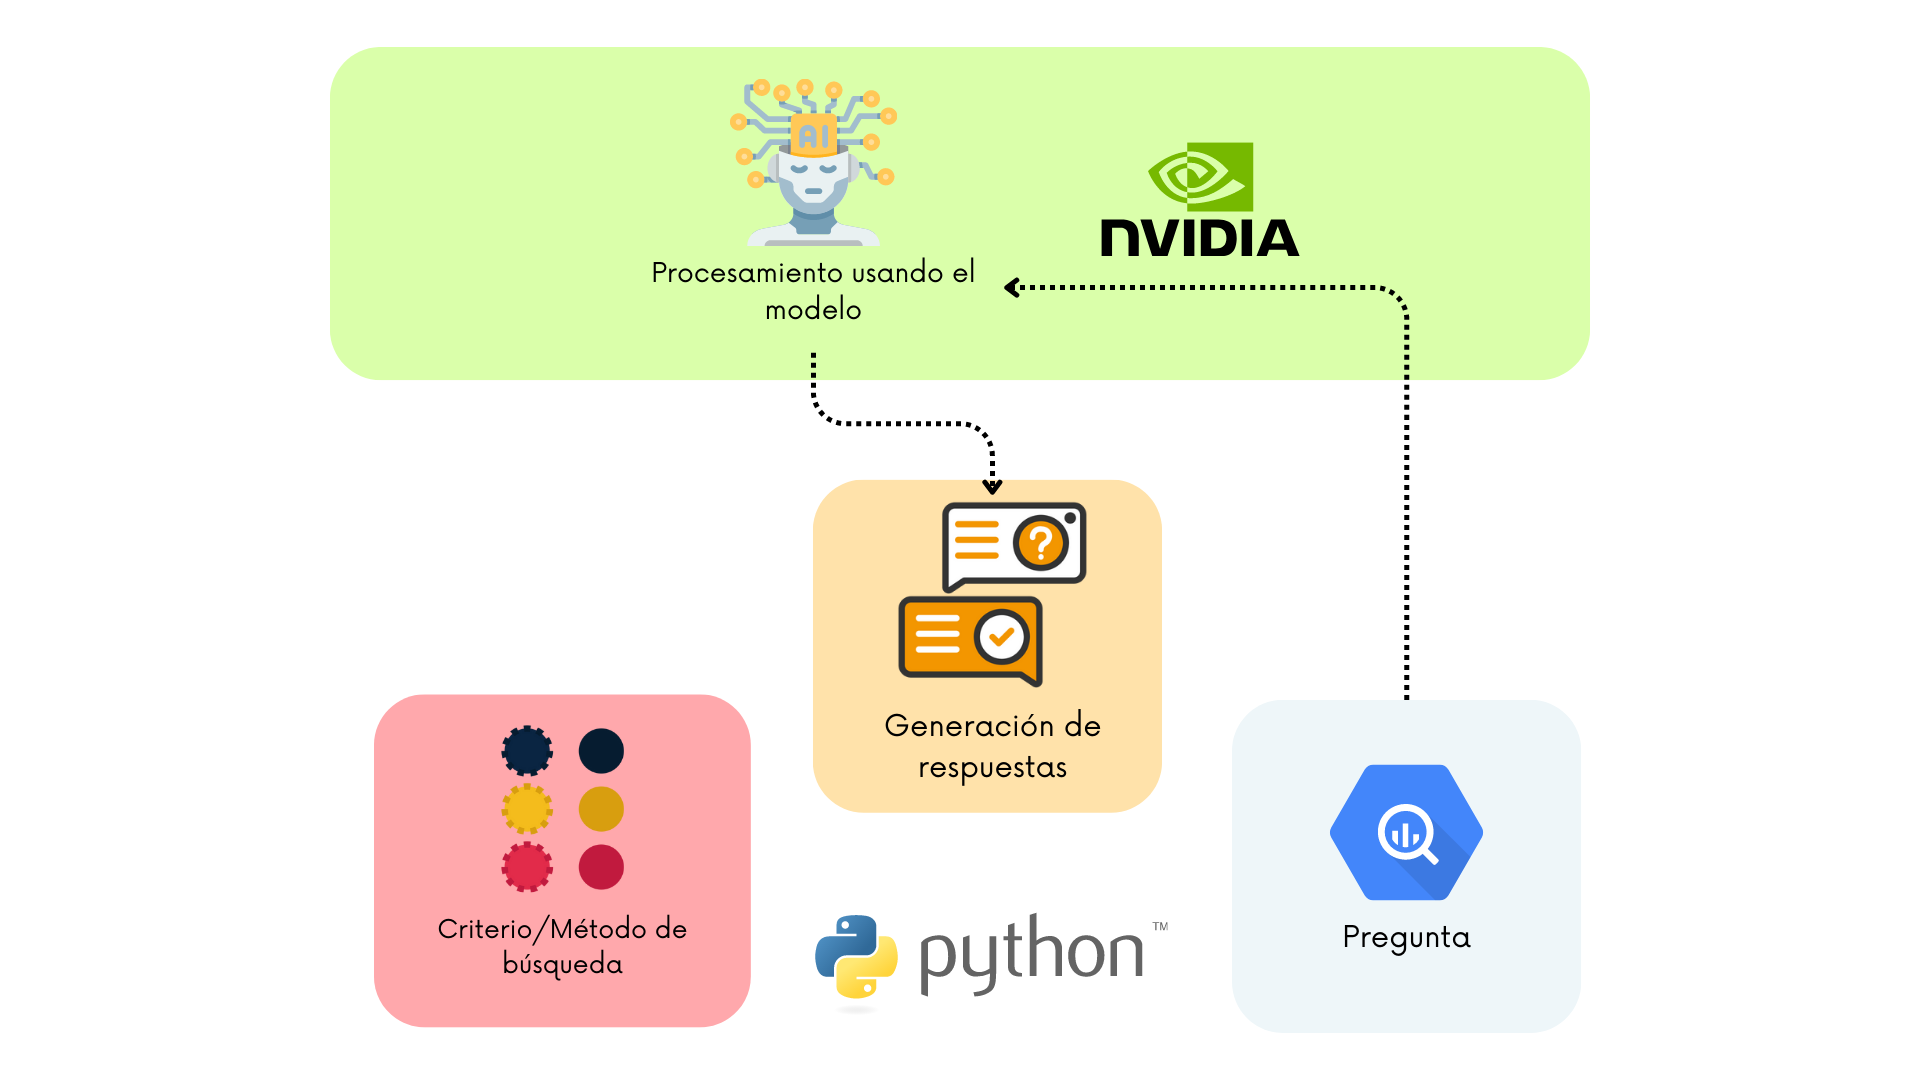

>>> `Fuente: Imagen de elaboración propia`

---
* En este punto Tenemos todo lo necesario para consultar el modelo.

>* Lo mas importante es definir una pregunta que este relacionada a nuestro contexto.

* Hacemos uso de **Nvidia CUDA** para agilizar el tiempo de respuesta y paralelizar parte del mismo en los nucleos de la GPU.

* Hacemos uso del **GarbageColector** para liberar almacenamiento de forma estatica.

In [ ]:
import gc

gc.collect()
torch.cuda.empty_cache()

query = input("Haz una pregunta sobre las normativas: ")

Haz una pregunta sobre las normativas: Cuantos cupos se ofertan para artes plasticas


---
* Aca verificamos que se obtengan resultados relacionados al contexto de nuestra pregunta.

* Mediante una consulta de **"similaridad"** a la base de vectores Chroma.

In [ ]:
docs= vectorstore.search(query,"similarity")
print(docs)

[Document(page_content='Articulo 1 A Partir Del Presente Acuerdo Se Contempla Un Cupo Equivalente Al 2 De Los Cupos Establecidos Para Cada Carrera En Su Sede Bogota Y Seccionales Para Ser Llenado Por Los Aspirantes De Municipios Pobres Seleccionados En Este Programa', metadata={'source': '/content/resultado.txt', 'start_index': 114763}), Document(page_content='Rector\nIgnacio Mantilla Prada\n6 Que El Paragrafo Del Articulo 4 De Dicha Resolucion Establecio La Distribucion De Los Cupos De La Sede Tumaco Para El Periodo 2016 01\n2 Docentes De Tiempo Completo Hasta 20 Horas Semanales', metadata={'source': '/content/resultado.txt', 'start_index': 172016}), Document(page_content='\nArticulo 1 A Partir De La Fecha Del Presente Acuerdo Se Establece Un Cupo Equivalente Al Dos Por Ciento 2 De Los Cupos Establecidos Para Cada Carrera Que Ofrezca La Universidad En Su Sede Bogota Y Seccionales Para Ser Llenado Por Miembros De Comunidades Indigenas', metadata={'source': '/content/resultado.txt', 'st

---
* Aca hacemos el llamado al modelo haciendo uso de los resultados que obtuvimos de la busqueda con Chroma y de la pregunta sobre la cual queremos una respuesta.

In [ ]:
chain.run(input_documents=docs, question=query)

Both `max_new_tokens` (=256) and `max_length`(=256) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


' 3'

---
* Aca se pueden hacer queries o consultas de prueba, sin contexto para medir la fiabilidad del modelo entrenado

In [ ]:
from langchain import PromptTemplate, LLMChain

In [ ]:
from langchain import PromptTemplate, LLMChain

user_input = input("Haz una pregunta: ")

prompt = PromptTemplate(
    input_variables=["question"],
    template=" {question}?")

gc.collect()
torch.cuda.empty_cache()

llm_chain = LLMChain(prompt=prompt, llm=local_llm)

print(llm_chain.run(user_input))

# **7.Metricas,Analisis y Conclusiones**

# **8.Referencias**
---

1. Google Colaboratory. (n.d.). Retrieved from https://colab.research.google.com/drive/1ZnlAqDkxVwnElAICrzFK2oucemrSfzh6#scrollTo=N2h9ARy23XM_
2. Google Colaboratory. (n.d.). Retrieved from https://colab.research.google.com/drive/161iuKadZkDEB-623rGOXwQZ2Hqv4gN54?usp=sharing#scrollTo=-xSH6H3DbfU3
3. Google Colaboratory. (n.d.). Retrieved from https://colab.research.google.com/drive/1BEZ_qgtVqSmOmCTuhHs7lHiYB5M5_myg?usp=sharing
4. Google Colaboratory. (n.d.). Retrieved from https://colab.research.google.com/drive/1NoHaZbKTgIKmdAkAGwPPHFLdxb3GScDc?usp=sharing#scrollTo=8oz8qJSjJNbV
5. Google Colaboratory. (n.d.). Retrieved from https://colab.research.google.com/drive/115ba3EFCT0PvyXzFNv9E18QnKiyyjsm5?usp=sharing#scrollTo=-YZzdNkvm8E2
6. Google Colaboratory. (n.d.). Retrieved from https://colab.research.google.com/drive/1NoHaZbKTgIKmdAkAGwPPHFLdxb3GScDc?usp=sharing#scrollTo=mtmwoYgZkDlc
7. Langchain Python API Documentation. (n.d.). Retrieved from https://python.langchain.com/en/latest/
8. Langchain Python API Documentation. (n.d.). Retrieved from https://python.langchain.com/en/latest/modules/indexes/vectorstores/getting_started.html
9. Langchain Python API Documentation. (n.d.). Retrieved from https://python.langchain.com/en/latest/modules/indexes/text_splitters/examples/recursive_text_splitter.html
10. Chroma Usage Guide. (n.d.). Retrieved from https://docs.trychroma.com/usage-guide
11. Stack Overflow. (2021, April 28). Mismatched tensor size error when generating text with beam search huggingface [Online forum post]. Retrieved from https://stackoverflow.com/questions/67221901/mismatched-tensor-size-error-when-generating-text-with-beam-search-huggingface
12. Langchain Python API Documentation. (n.d.). Retrieved from https://python.langchain.com/en/latest/modules/indexes/retrievers/examples/chroma_self_query.html
13. Artificialis. (n.d.). Crafting an engaging chatbot: Harnessing the power of Alpaca and Langchain [Blog post]. Retrieved from https://medium.com/artificialis/crafting-an-engaging-chatbot-harnessing-the-power-of-alpaca-and-langchain-66a51cc9d6de
14. tloen/alpaca-lora [Computer software]. (n.d.). GitHub. Retrieved from https://github.com/tloen/alpaca-lora
15. ML Expert. (n.d.). Alpaca Fine Tuning [Blog post]. Retrieved from https://www.mlexpert.io/machine-learning/tutorials/alpaca-fine-tuning
16. Langchain Blog. (n.d.). Langchain Chroma [Blog post]. Retrieved from https://blog.langchain.dev/langchain-chroma/
17. Towards Data Science. (n.d.). 4 ways of question answering in Langchain [Blog post]. Retrieved from https://towardsdatascience.com/4-ways-of-question-answering-in-langchain-188c6707cc5a
18. Hugging Face – On a mission to solve NLP, one commit at a time.. (n.d.). Document Question Answering [Web page]. Retrieved from https://huggingface.co/tasks/document-question-answering
19. Wandb.ai pshar053/Alpaca-Lora-7B-FineTuning/reports/Fine-Tuning-Alpaca--Vmlldzo0MjE3NjYz [Web page]. (n.d.). Wandb.ai pshar053/Alpaca-Lora-7B-FineTuning/reports/Fine-Tuning-Alpaca--Vmlldzo0MjE3NjYz [Web page]. Wandb.ai pshar053/Alpaca-Lora-7B-FineTuning/reports/Fine-Tuning-Alpaca--Vmlldzo0MjE3NjYz. Retrieved from https://wandb.ai/pshar053/Alpaca-Lora-7B-FineTuning/reports/Fine-Tuning-Alpaca--Vmlldzo0MjE3NjYz
20. Artificial Corner. (n.d.). GPT4All is the local ChatGPT for your documents and it is free [Blog post]. Retrieved from https://artificialcorner.com/gpt4all-is-the-local-chatgpt-for-your-documents-and-it-is-free-df1016bc335
21. Vaclav Kosar. (n.d.). Tokenization in Machine Learning Explained [Blog post]. Retrieved from https://vaclavkosar.com/ml/Tokenization-in-Machine-Learning-Explained
22. Vitalflux.com. (n.d.). LLM Chain OpenAI ChatGPT Python Example [Web page]. Retrieved from https://vitalflux.com/llm-chain-openai-chatgpt-python-example/
23. linonetwo/langchain-alpaca [Computer software]. (n.d.). GitHub. Retrieved from https://github.com/linonetwo/langchain-alpaca
24. hwchase17/chroma-langchain [Computer software]. (n.d.). GitHub. Retrieved from https://github.com/hwchase17/chroma-langchain/blob/master/persistent-qa.ipynb

---